In [3]:
# Punto 1: Dimensiones y estructura del dataset

# Cantidad de filas y columnas
print("Filas y columnas:")
print(df_final.shape)

# Primeras filas del dataset
print("\nPrimeras filas:")
print(df_final.head())

# Tipos de datos por columna
print("\nTipos de datos:")
print(df_final.dtypes)

# Cantidad de valores nulos por columna (por si quedó algo)
print("\nValores nulos por columna:")
print(df_final.isnull().sum())


Filas y columnas:
(0, 5)

Primeras filas:
Empty DataFrame
Columns: [Rama, Fecha, Remuneracion, IPC, Monto_Real]
Index: []

Tipos de datos:
Rama                    object
Fecha           datetime64[ns]
Remuneracion            object
IPC                    float64
Monto_Real             float64
dtype: object

Valores nulos por columna:
Rama            0
Fecha           0
Remuneracion    0
IPC             0
Monto_Real      0
dtype: int64


In [14]:
# Cargar el archivo y ubicar la fila correcta del IPC
df_ipc_raw = pd.read_excel(path_ipc, sheet_name="17_1_04", header=2)

# Extraer fila con datos del "Nivel general"
fila_nivel_general = df_ipc_raw[df_ipc_raw["Unnamed: 0"] == "Nivel general"]

# Eliminar columna de nombre
fila_nivel_general = fila_nivel_general.drop(columns=["Unnamed: 0"])

# Transponer y construir DataFrame
df_ipc_t = fila_nivel_general.T.reset_index()
df_ipc_t.columns = ["Fecha", "IPC"]

# Conversión de tipos
df_ipc_t["Fecha"] = pd.to_datetime(df_ipc_t["Fecha"], errors="coerce")
df_ipc_t["IPC"] = pd.to_numeric(df_ipc_t["IPC"], errors="coerce")

# Filtrar rango deseado
df_ipc_t = df_ipc_t.dropna()
df_ipc_t = df_ipc_t[(df_ipc_t["Fecha"] >= "2017-12-01") & (df_ipc_t["Fecha"] <= "2023-12-01")]


C:\Users\usuario\AppData\Local\Temp\ipykernel_13796\1119802341.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ipc_t["Fecha"] = pd.to_datetime(df_ipc_t["Fecha"], errors="coerce")


In [15]:
df_final.head(20)

,Rama,Fecha,Remuneracion,IPC,Monto_Real


In [13]:
print(df_ipc_t["Fecha"].min(), "→", df_ipc_t["Fecha"].max())
print("Filas IPC:", len(df_ipc_t))
df_ipc_t.head()


NaT → NaT
Filas IPC: 0


,Fecha,IPC


In [5]:
print("Remuneraciones:")
print(df_rem["Fecha"].min(), "→", df_rem["Fecha"].max())
print("Filas:", len(df_rem))



Remuneraciones:
2017-12-01 00:00:00 → 2023-12-01 00:00:00
Filas: 5329


In [19]:
# Releer hoja completa
df_ipc_raw = pd.read_excel(path_ipc, sheet_name="17_1_04", header=2)

# Ver filas que contienen texto "Nivel general"
nivel_general_filas = df_ipc_raw[df_ipc_raw.iloc[:, 0].astype(str).str.contains("Nivel general", case=False, na=False)]

# Mostrar el resultado
nivel_general_filas.head()





,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89
0,Nivel general y divisiones COICOP,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,...,2018-07-24 00:00:00,2017-08-24 00:00:00,2016-09-24 00:00:00,2015-10-24 00:00:00,2014-11-24 00:00:00,2013-12-24 00:00:00,2025-01-25 00:00:00,2025-02-25 00:00:00,2025-03-25 00:00:00,2025-04-26 00:00:00
3,Nivel general,23.5,23.5,23.9,25.1,26,26.3,29.1,31.2,33.7,...,264.2,239.7,209.1,195,172.2,124.7,85.5,72,60.9,52.3


In [20]:
# Cargar hoja IPC desde el archivo
df_ipc_raw = pd.read_excel(path_ipc, sheet_name="17_1_04", header=2)

# Extraer explícitamente la fila que tiene los valores de "Nivel general"
fila_nivel_general = df_ipc_raw.iloc[3, 1:]  # omitimos la primera columna, que es el nombre de la categoría

# Crear DataFrame con fechas y valores IPC
df_ipc_t = fila_nivel_general.reset_index()
df_ipc_t.columns = ["Fecha", "IPC"]

# Convertir tipos
df_ipc_t["Fecha"] = pd.to_datetime(df_ipc_t["Fecha"], errors="coerce")
df_ipc_t["IPC"] = pd.to_numeric(df_ipc_t["IPC"], errors="coerce")

# Filtrar fechas válidas
df_ipc_t = df_ipc_t.dropna()
df_ipc_t = df_ipc_t[(df_ipc_t["Fecha"] >= "2017-12-01") & (df_ipc_t["Fecha"] <= "2023-12-01")]

# Verificar
df_ipc_t.head()


C:\Users\usuario\AppData\Local\Temp\ipykernel_13796\3830341935.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ipc_t["Fecha"] = pd.to_datetime(df_ipc_t["Fecha"], errors="coerce")


,Fecha,IPC


In [21]:
df_ipc_t.head()
df_ipc_t.dtypes


Fecha    datetime64[ns]
IPC             float64
dtype: object

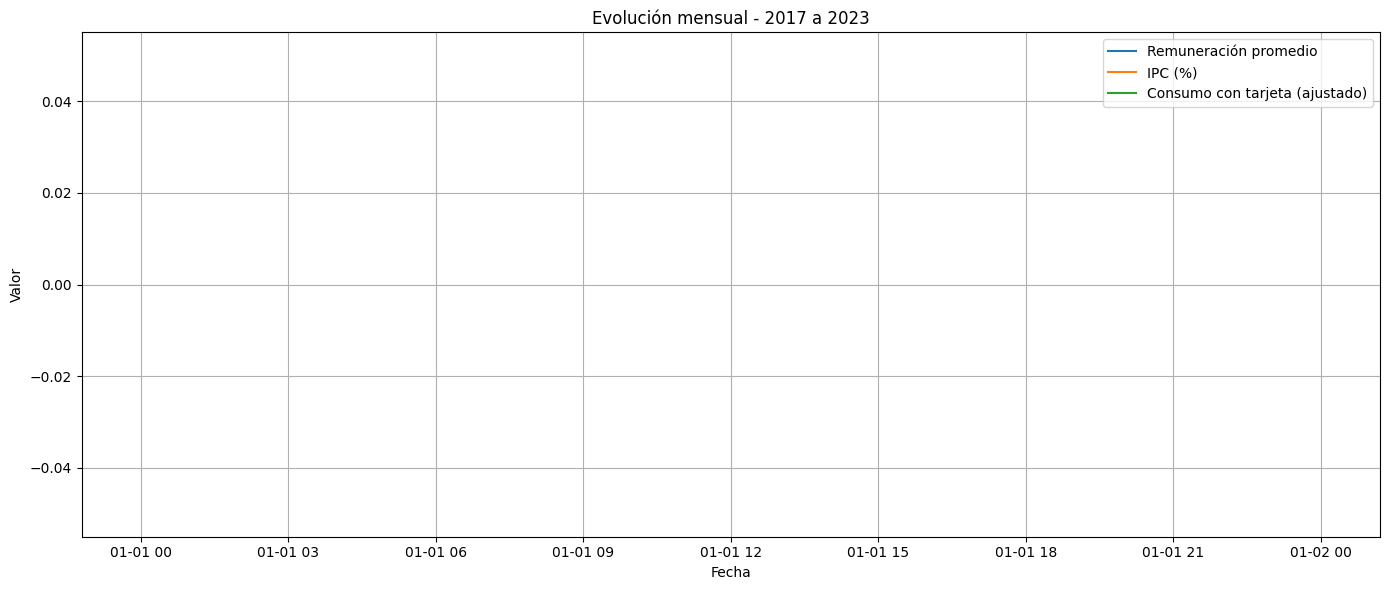

In [22]:
import matplotlib.pyplot as plt

# Crear DataFrame promedio mensual (sólo si hay múltiples ramas)
df_mensual = df_final.groupby("Fecha").agg({
    "Remuneracion": "mean",
    "IPC": "mean",
    "Monto_Real": "mean"
}).reset_index()

# Gráfico de líneas
plt.figure(figsize=(14, 6))
plt.plot(df_mensual["Fecha"], df_mensual["Remuneracion"], label="Remuneración promedio")
plt.plot(df_mensual["Fecha"], df_mensual["IPC"], label="IPC (%)")
plt.plot(df_mensual["Fecha"], df_mensual["Monto_Real"], label="Consumo con tarjeta (ajustado)")

plt.title("Evolución mensual - 2017 a 2023")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
print(df_mensual.info())
print(df_mensual.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Fecha         0 non-null      datetime64[ns]
 1   Remuneracion  0 non-null      object        
 2   IPC           0 non-null      float64       
 3   Monto_Real    0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 132.0+ bytes
None
      Fecha  IPC  Monto_Real
count     0  0.0         0.0
mean    NaT  NaN         NaN
min     NaT  NaN         NaN
25%     NaT  NaN         NaN
50%     NaT  NaN         NaN
75%     NaT  NaN         NaN
max     NaT  NaN         NaN
std     NaN  NaN         NaN
